In [1]:
import numpy as np
import pyvibdmc.simulation_utilities as util
import pyvibdmc as dmc
from pyvibdmc import potential_manager as pm
import matplotlib.pyplot as plt
import sys,os
import pandas as pd

In [2]:
pot_dir = '/home/fenris/McCoy_Group/dvr/sample_potentials/FortPots/Partridge_Schwenke_H2O/'
py_file = 'h2o_potential.py'
pot_func = 'water_pot'

water_pot_ps = pm.Potential(potential_function=pot_func,
                      python_file=py_file,
                      potential_directory=pot_dir,
                      num_cores=1)

pot_dir = '/home/fenris/McCoy_Group/conv/h2o_dmc/'
py_file = 'h2o_nn_pot.py'
pot_func = 'h2o_pot'

water_pot_nn = pm.Potential(potential_function=pot_func,
                      python_file=py_file,
                      potential_directory=pot_dir,
                      num_cores=1)

In [3]:
eq_coord = np.array([[1.81005599,  0.        ,  0.        ],
                       [-0.45344658,  1.75233806,  0.        ],
                       [ 0.        ,  0.        ,  0.        ]])
cds = np.tile(eq_coord, (1001, 1, 1))
d_r = np.linspace(-1, 1, num=1001)
padded_d_r = np.zeros(cds.shape)
padded_d_r[:,0,0] = d_r
cds += padded_d_r

In [4]:
from pyvibdmc.analysis import *

In [5]:
sim = SimInfo('h2o_nn_dmc_output/h2o_nn_0_sim_info.hdf5')

In [6]:
increment = 1000
cds, dws = sim.get_wfns(np.arange(2500,9500+increment,increment))

In [7]:
E_ps = water_pot_ps.getpot(cds[-1000:])
E_nn = water_pot_nn.getpot(cds[-1000:])

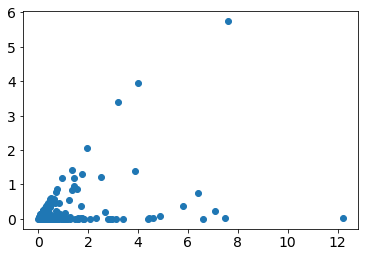

In [9]:
np.argmax(E_ps)

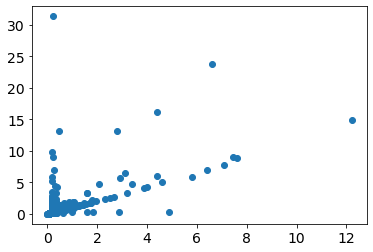

In [8]:
plt.scatter(E_ps, E_nn)

In [22]:
cd = np.array([cds[len(cds)-1000+895]])

In [21]:
water_pot_nn.getpot(cd)

array([0.03782919], dtype=float32)

In [8]:
import os
os.getcwd()

'/home/fenris/McCoy_Group/conv/h2o_dmc'